In [1]:
import sys
import datetime
import pandas as pd

sys.path.append('../../')
from src.util.functions import Functions
from src.visualize.visualizer import BarPlot
# Disable warning
pd.options.mode.chained_assignment = None 

level = 'regioni'
region_name = "emilia-romagna"

path_data = '../../data'
path_img_root =  '{path_data}/imgs/grafici/{level}/{region}'.format(path_data=path_data, level=level, region=region_name)
path_csv = '{path_data}/csv'.format(path_data=path_data)
csv_in_name = '{path_csv}/{level}/covid19-{region_name}.csv'.format(path_csv=path_csv, level=level, region_name=region_name)

In [2]:
df_raw = pd.read_csv(csv_in_name)
df_raw

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-02-25T18:00:00,8,Emilia-Romagna,15,2,17,9,26,8,8,...,0.0,243.0,0.0,3.0,11.76,65.38,3.29,0.00,0.00,44.44
1,2020-02-26T18:00:00,8,Emilia-Romagna,20,3,23,23,46,20,21,...,1.0,186.0,0.0,14.0,13.04,50.00,11.29,0.00,50.00,76.92
2,2020-02-27T18:00:00,8,Emilia-Romagna,36,6,42,54,96,50,50,...,0.0,456.0,0.0,31.0,14.29,43.75,10.96,0.00,100.00,108.70
3,2020-02-28T18:00:00,8,Emilia-Romagna,56,6,62,81,143,47,48,...,1.0,244.0,0.0,27.0,9.68,43.36,19.67,0.00,0.00,48.96
4,2020-02-29T17:00:00,8,Emilia-Romagna,86,11,97,116,213,70,72,...,2.0,273.0,0.0,35.0,11.34,45.54,26.37,0.00,83.33,48.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
357,2021-02-16T17:00:00,8,Emilia-Romagna,1975,175,2150,34887,37037,-533,968,...,35.0,34678.0,5876.0,-539.0,8.14,5.81,2.79,16.47,1.74,-1.42
358,2021-02-17T17:00:00,8,Emilia-Romagna,1902,176,2078,33190,35268,-1769,1025,...,31.0,27947.0,5739.0,-1697.0,8.47,5.89,3.67,17.86,0.57,-4.78
359,2021-02-18T17:00:00,8,Emilia-Romagna,1890,181,2071,32858,34929,-339,1565,...,22.0,29633.0,5787.0,-332.0,8.74,5.93,5.28,27.04,2.84,-0.96
360,2021-02-19T17:00:00,8,Emilia-Romagna,1902,183,2085,32852,34937,8,1821,...,46.0,30716.0,5022.0,-6.0,8.78,5.97,5.93,36.26,1.10,0.02


In [3]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2021, 2, 20, 17, 0)

In [4]:
# Print stats
# df_n[-2:].iloc[:, 1:]
df_last = df_raw[-1:]
print('Nuovi positivi:', df_last['nuovi_positivi'].item())
print('Nuovi tamponi:', df_last['nuovi_tamponi'].item())
print('Percentuale nuovi positivi/nuovi tamponi:', round(df_last['nuovi_positivi'].item()/df_last['nuovi_tamponi'].item(), 2) * 100, '%')
print('Nuovi guariti:', df_last['nuovi_dimessi_guariti'].item())
print('Nuovi deceduti:', df_last['nuovi_deceduti'].item())
print('Variazione positivi ricoverati con sintomi:', df_last['variazione_ricoverati_con_sintomi'].item())
print('Variazione positivi in terapia intensiva:', df_last['variazione_terapia_intensiva'].item())
print('Variazione positivi in isolamento dimiciliare:', df_last['variazione_isolamento_domiciliare'].item())

Nuovi positivi: 1724
Nuovi tamponi: 31943.0
Percentuale nuovi positivi/nuovi tamponi: 5.0 %
Nuovi guariti: 1489.0
Nuovi deceduti: 23.0
Variazione positivi ricoverati con sintomi: -3.0
Variazione positivi in terapia intensiva: -7.0
Variazione positivi in isolamento dimiciliare: 206.0


In [5]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2021, 2, 20, 17, 0)

In [6]:
# TODO: define function
days = 60
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-12-22T17:00:00,8,Emilia-Romagna,2891,210,3101,56645,59746,-2308,1162,...,68.0,19892.0,4435.0,-2292.0,6.77,5.19,5.84,26.20,3.45,-3.72
1,2020-12-23T17:00:00,8,Emilia-Romagna,2803,207,3010,55015,58025,-1721,1129,...,71.0,17913.0,4765.0,-1630.0,6.88,5.19,6.30,23.69,-1.43,-2.88
2,2020-12-24T17:00:00,8,Emilia-Romagna,2718,201,2919,54380,57299,-726,1692,...,76.0,15906.0,5825.0,-635.0,6.89,5.09,10.64,29.05,-2.90,-1.25
3,2020-12-25T17:00:00,8,Emilia-Romagna,2711,206,2917,56063,58980,1681,2127,...,65.0,10861.0,4546.0,1683.0,7.06,4.95,19.58,46.79,2.49,2.93
4,2020-12-26T17:00:00,8,Emilia-Romagna,2630,214,2844,54443,57287,-1693,1756,...,24.0,5775.0,3587.0,-1620.0,7.52,4.96,30.41,48.95,3.88,-2.87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,2021-02-16T17:00:00,8,Emilia-Romagna,1975,175,2150,34887,37037,-533,968,...,35.0,34678.0,5876.0,-539.0,8.14,5.81,2.79,16.47,1.74,-1.42
57,2021-02-17T17:00:00,8,Emilia-Romagna,1902,176,2078,33190,35268,-1769,1025,...,31.0,27947.0,5739.0,-1697.0,8.47,5.89,3.67,17.86,0.57,-4.78
58,2021-02-18T17:00:00,8,Emilia-Romagna,1890,181,2071,32858,34929,-339,1565,...,22.0,29633.0,5787.0,-332.0,8.74,5.93,5.28,27.04,2.84,-0.96
59,2021-02-19T17:00:00,8,Emilia-Romagna,1902,183,2085,32852,34937,8,1821,...,46.0,30716.0,5022.0,-6.0,8.78,5.97,5.93,36.26,1.10,0.02


In [7]:
# Define figures properties
graph_prop = {'path_root': path_img,
              'label_font': 14,
              'data': {'label': 'Data', 'ticks': lambda x: x.split('T')[0]},
              'nuovi_positivi': {'label': 'Nuovi positivi', 'file_name': 'nuovi_positivi'},
              'np_su_nt': {'label': 'Nuovi positivi / Nuovi tamponi (%)', 'file_name': 'nuovi_positivi_su_nuovi_tamponi'},
              'np_su_nct': {'label': 'Nuovi positivi / Nuovi casi testati (%)', 'file_name': 'nuovi_positivi_su_nuovi_casi_testati'},
              'totale_positivi': {'label': 'Totale positivi', 'file_name': 'totale_positivi'},
              'var_pos_perc': {'label': 'Variazione totale positivi (%)', 'file_name': 'variazione_totale_positivi_perc'},
              'terapia_intensiva': {'label': 'Terapia intensiva', 'file_name': 'terapia_intensiva'},
              'var_ti_perc': {'label': 'Variazione terapia intensiva (%)', 'file_name': 'variazione_terapia_intensiva_perc'},
              'ti_su_to': {'label': 'Terapia intensiva / Totale ospedalizzati (%)', 'file_name': 'terapia_intensiva_su_totale_ospedalizzati'},
              'saturazione_terapia_intensiva': {'label': 'Saturazione terapia intensiva (%)', 'file_name': 'saturazione_terapia_intensiva'},
              'totale_ospedalizzati': {'label': 'Totale ospedalizzati', 'file_name': 'totale_ospedalizzati'},
              'to_su_tp': {'label': 'Totale ospedalizzati / Totale positivi (%)', 'file_name': 'totale_ospedalizzati_su_totale_positivi'},
              'nuovi_deceduti': {'label': 'Nuovi deceduti', 'file_name': 'nuovi_deceduti'},
              'nuovi_dimessi_guariti': {'label': 'Nuovi dimessi guariti', 'file_name': 'nuovi_dimessi_guariti'}}

# Create BarPlot object
bp = BarPlot(df, 'data', graph_prop)

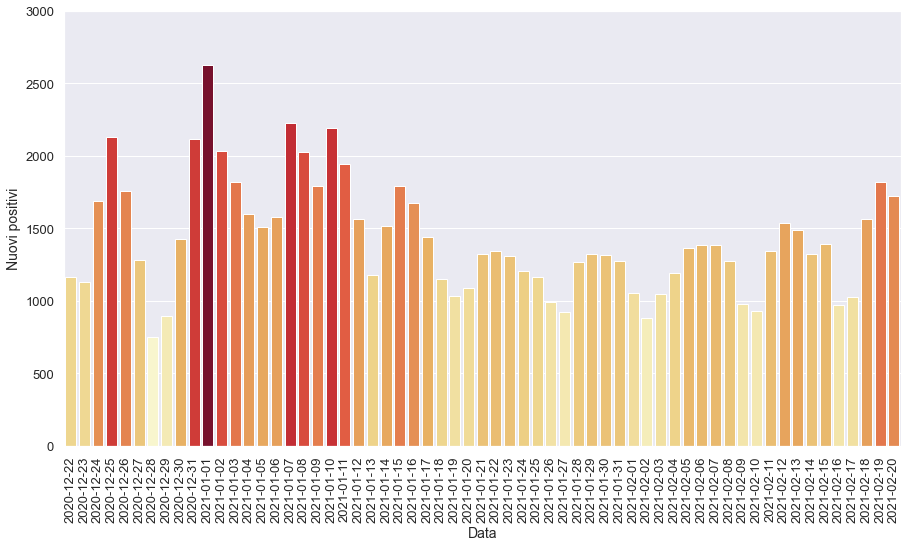

In [8]:
# New positives on new swabs in the last 60 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

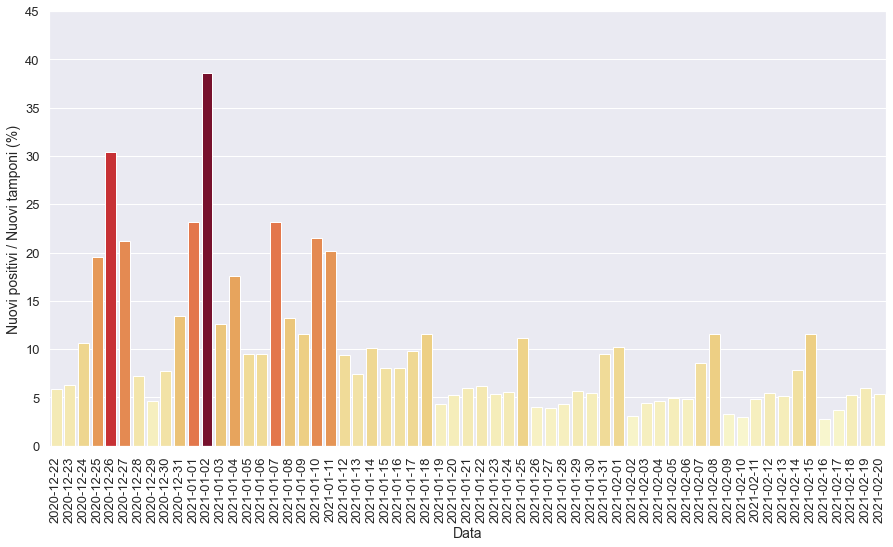

In [9]:
# New positives on new swabs in the last 60 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

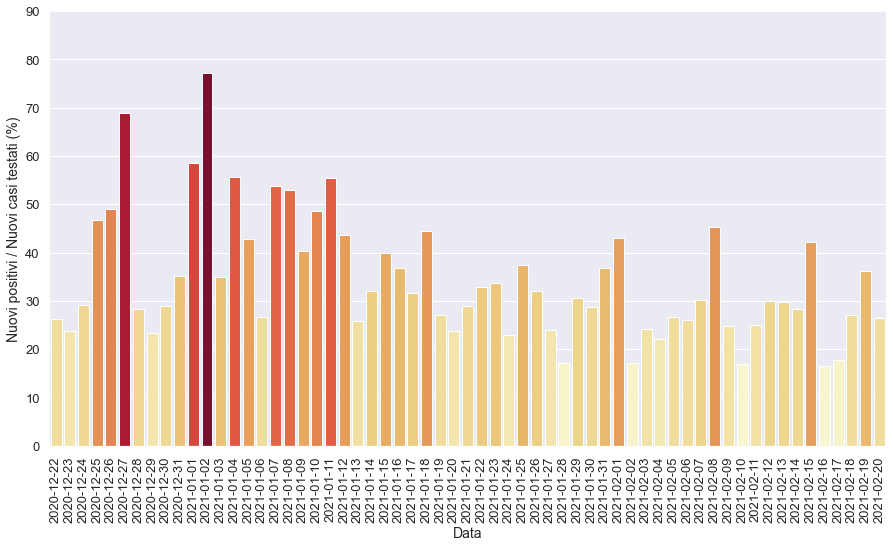

In [10]:
# New positives on new tested cases in the last 60 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

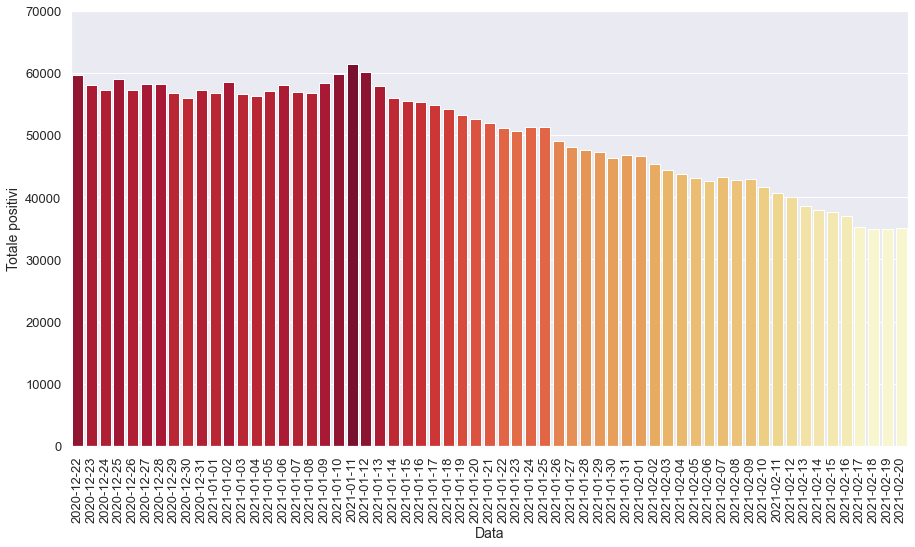

In [11]:
# Percentage of variation of positives in the last 60 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

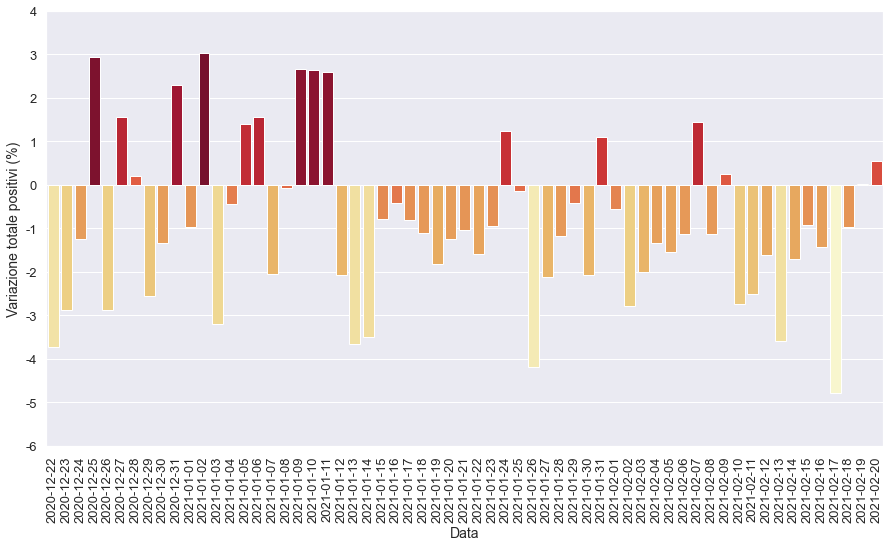

In [12]:
# Percentage of variation of total positives in the last 60 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

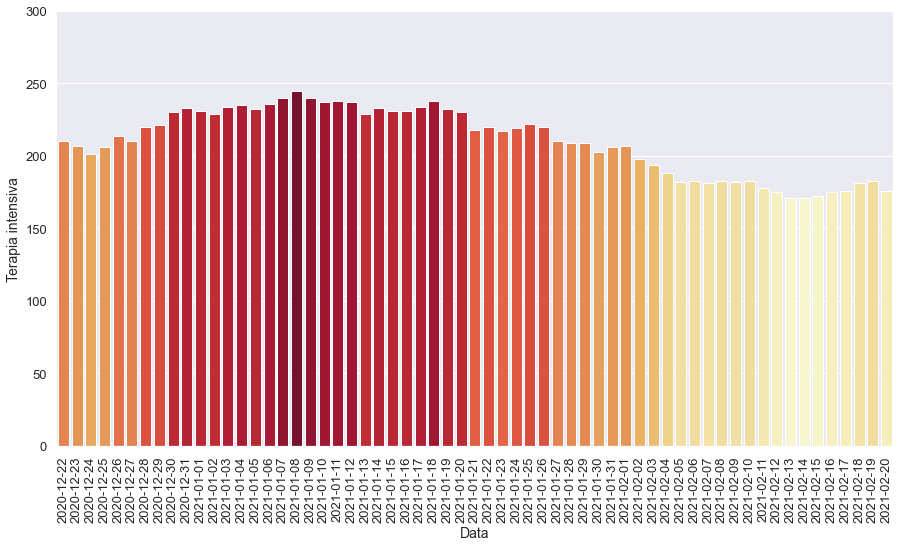

In [13]:
# Positives in ICU in the last 60 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

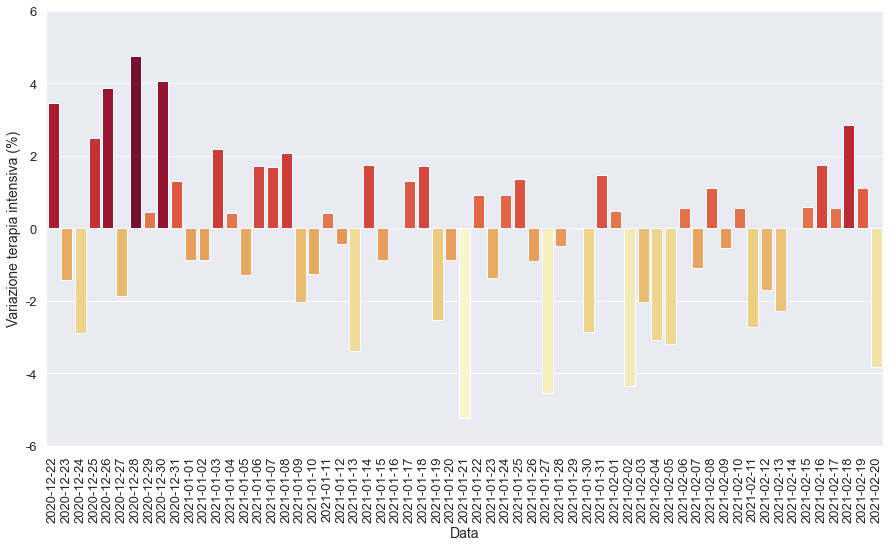

In [14]:
# Percentage of variation of positives in ICU in the last 60 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

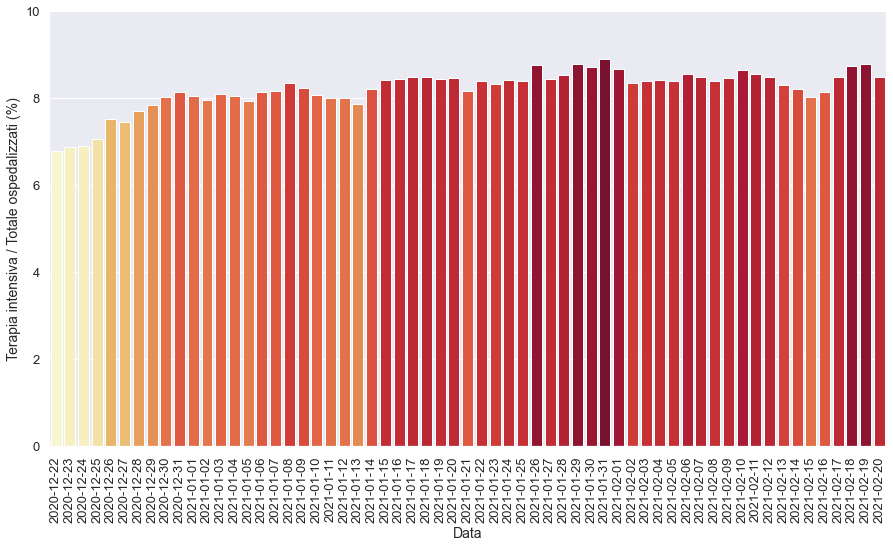

In [15]:
# Positives in ICU in the last 60 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

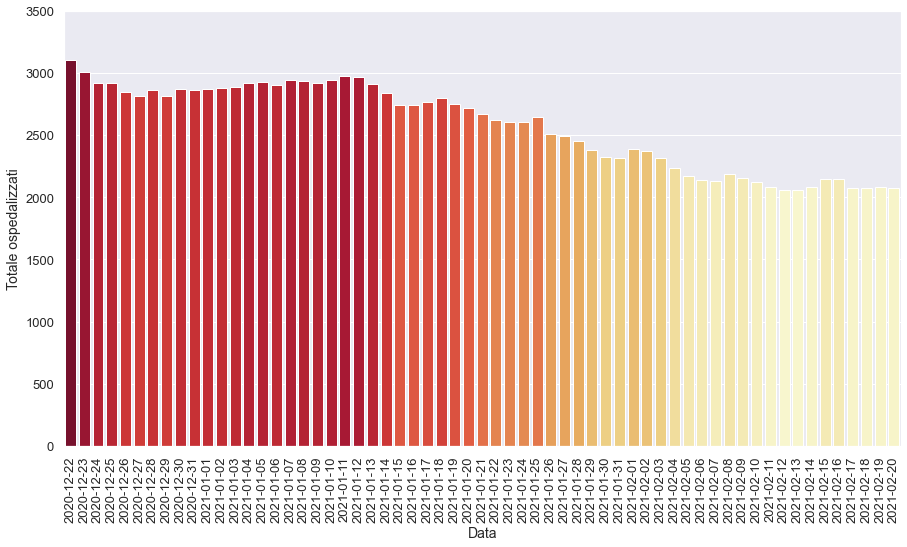

In [16]:
# Hospitalized positives in the last 60 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

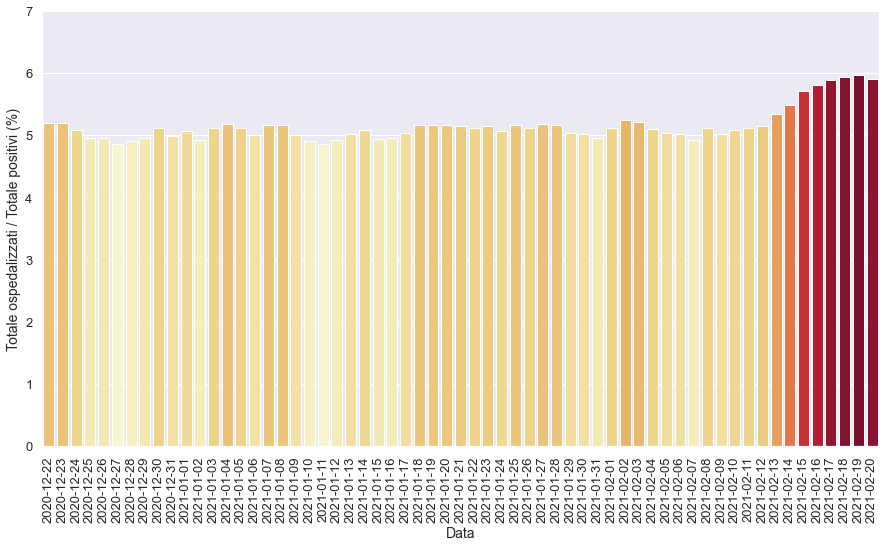

In [17]:
# Hospitalized positives in the last 60 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

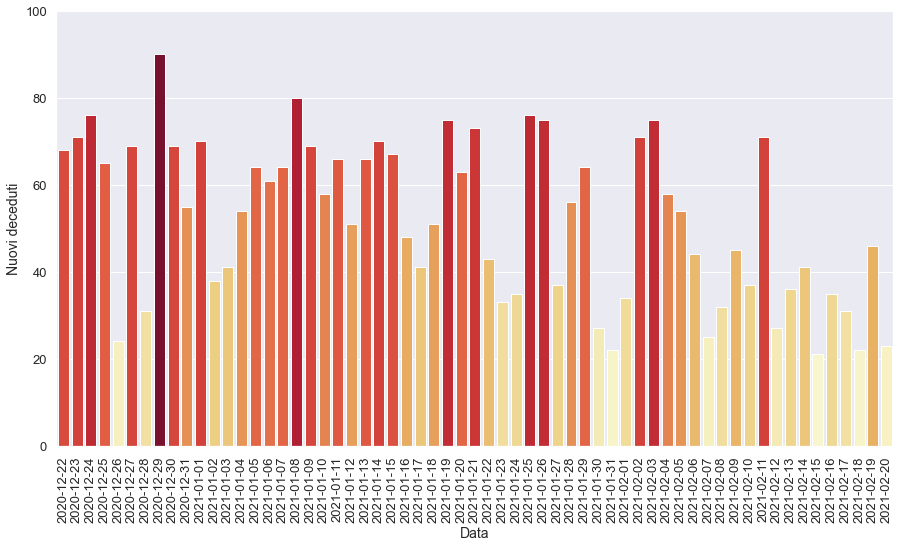

In [18]:
# New deads in the last 60 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

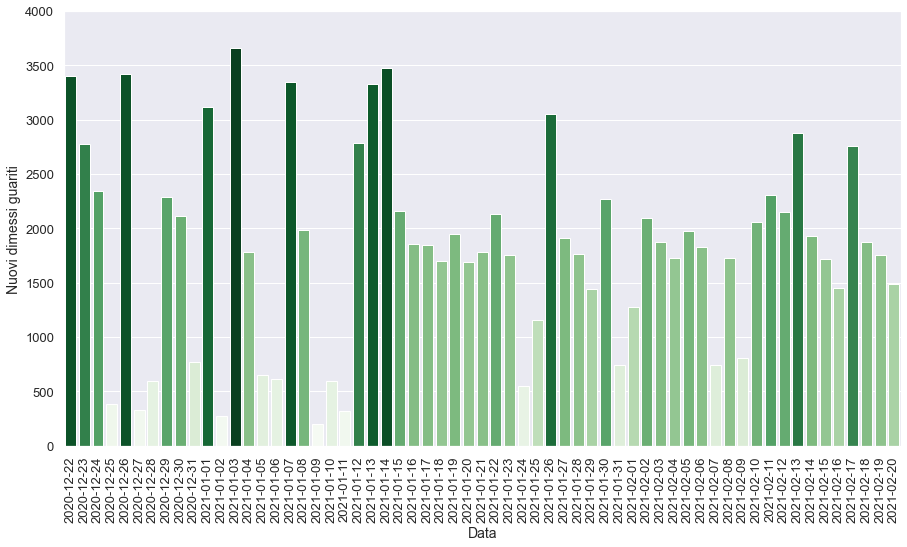

In [19]:
# New healed in the last 60 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [20]:
# TODO: define function
days = 30
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2021-01-21T17:00:00,8,Emilia-Romagna,2456,218,2674,49363,52037,-542,1320,...,73.0,21949.0,4578.0,-496.0,8.15,5.14,6.01,28.83,-5.22,-1.03
1,2021-01-22T17:00:00,8,Emilia-Romagna,2402,220,2622,48589,51211,-826,1347,...,43.0,21709.0,4089.0,-774.0,8.39,5.12,6.20,32.94,0.92,-1.59
2,2021-01-23T17:00:00,8,Emilia-Romagna,2390,217,2607,48125,50732,-479,1310,...,33.0,24676.0,3886.0,-464.0,8.32,5.14,5.31,33.71,-1.36,-0.94
3,2021-01-24T17:00:00,8,Emilia-Romagna,2383,219,2602,48755,51357,625,1208,...,35.0,21825.0,5281.0,630.0,8.42,5.07,5.53,22.87,0.92,1.23
4,2021-01-25T17:00:00,8,Emilia-Romagna,2422,222,2644,48645,51289,-68,1164,...,76.0,10436.0,3112.0,-110.0,8.40,5.16,11.15,37.40,1.37,-0.13
5,2021-01-26T17:00:00,8,Emilia-Romagna,2293,220,2513,46629,49142,-2147,993,...,75.0,24641.0,3101.0,-2016.0,8.75,5.11,4.03,32.02,-0.90,-4.19
6,2021-01-27T17:00:00,8,Emilia-Romagna,2281,210,2491,45615,48106,-1036,923,...,37.0,23751.0,3867.0,-1014.0,8.43,5.18,3.89,23.87,-4.55,-2.11
7,2021-01-28T17:00:00,8,Emilia-Romagna,2242,209,2451,45088,47539,-567,1265,...,56.0,29181.0,7360.0,-527.0,8.53,5.16,4.34,17.19,-0.48,-1.18
8,2021-01-29T17:00:00,8,Emilia-Romagna,2172,209,2381,44964,47345,-194,1320,...,64.0,23361.0,4320.0,-124.0,8.78,5.03,5.65,30.56,0.00,-0.41
9,2021-01-30T17:00:00,8,Emilia-Romagna,2124,203,2327,44032,46359,-986,1314,...,27.0,24020.0,4566.0,-932.0,8.72,5.02,5.47,28.78,-2.87,-2.08


In [21]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

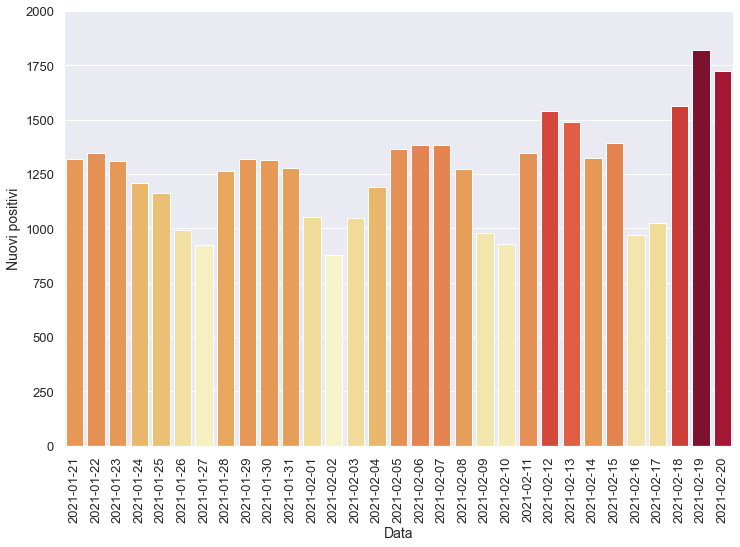

In [22]:
# New positives on new swabs in the last 30 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

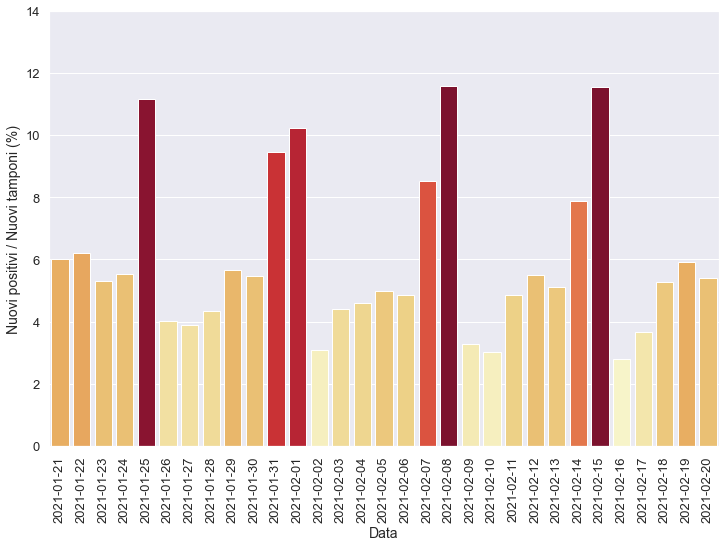

In [23]:
# New positives on new swabs in the last 30 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

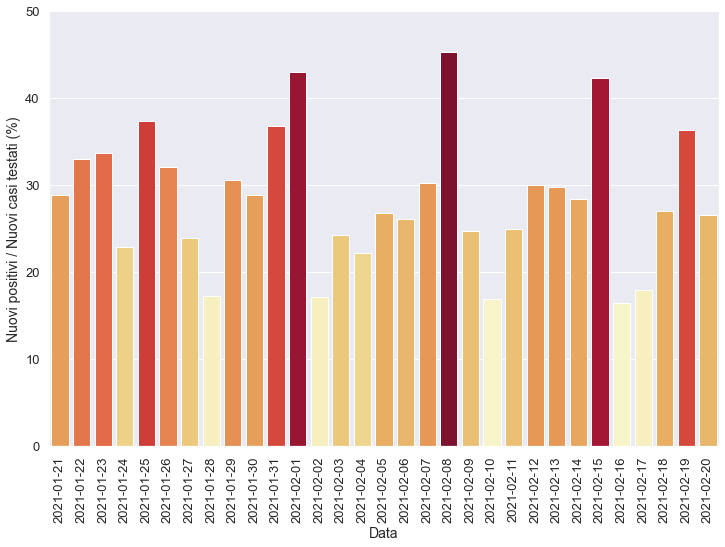

In [24]:
# New positives on new tested cases in the last 30 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

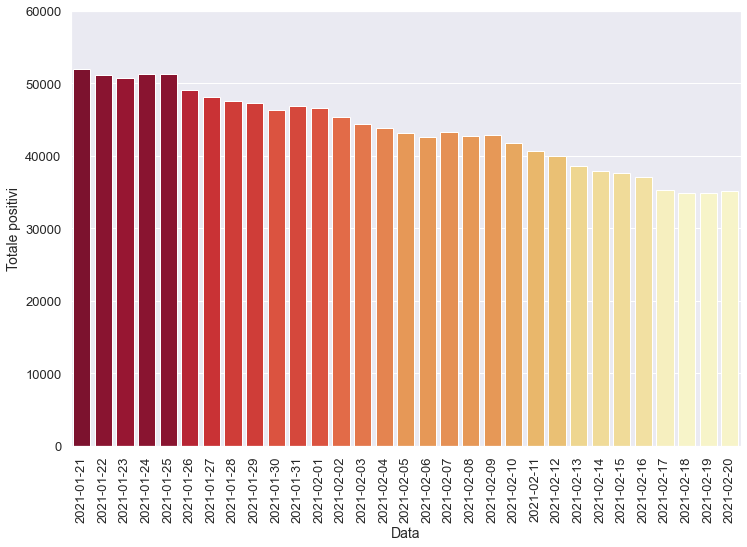

In [25]:
# Number of positives in the last 30 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

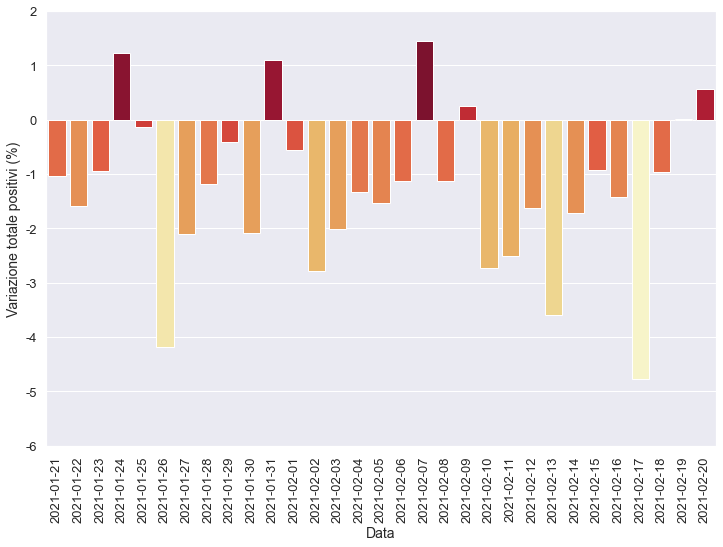

In [26]:
# Percentage of variation of positives in the last 30 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

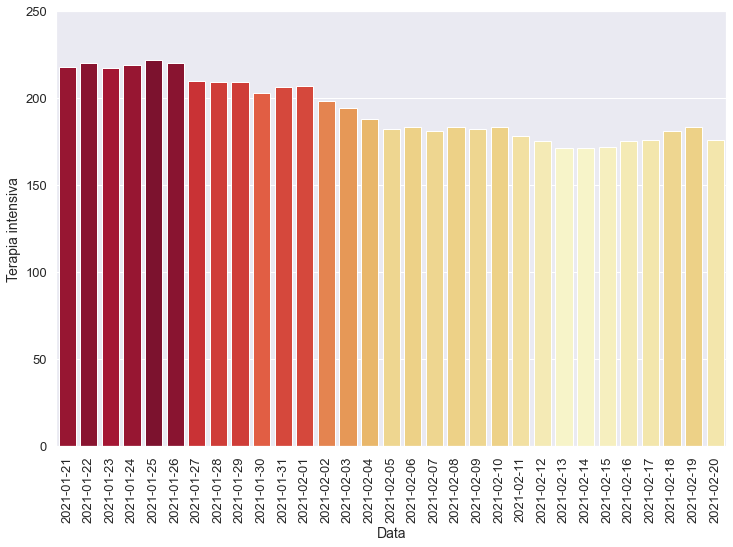

In [27]:
# Positives in ICU in the last 30 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

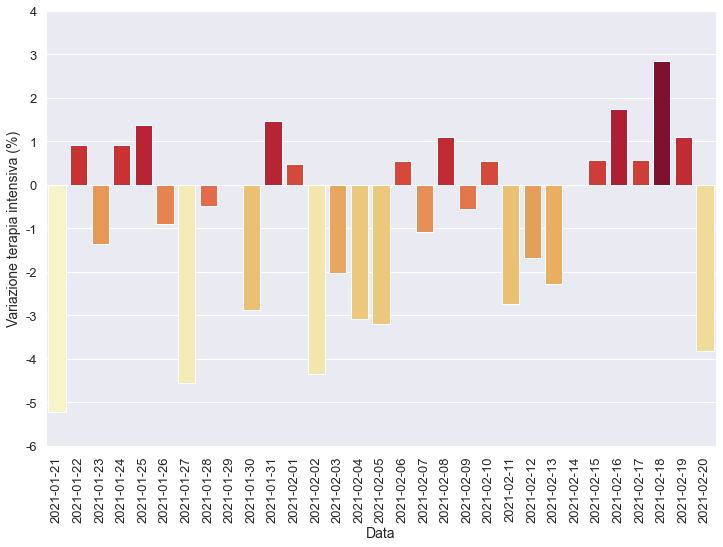

In [28]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

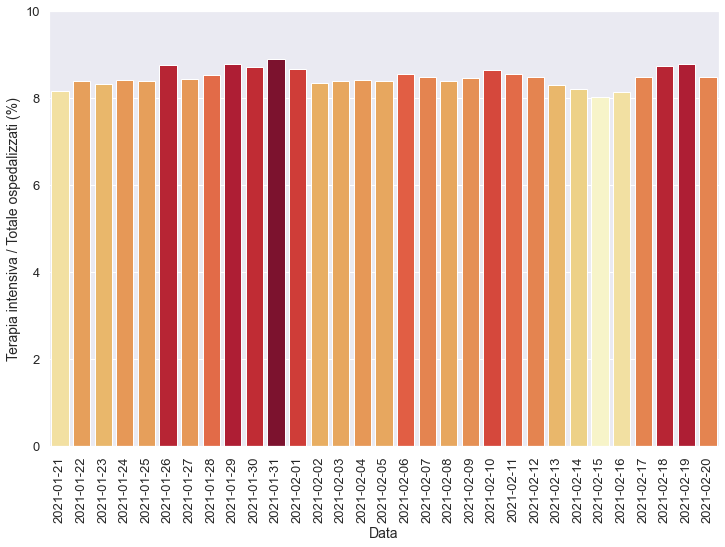

In [29]:
# TODO
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

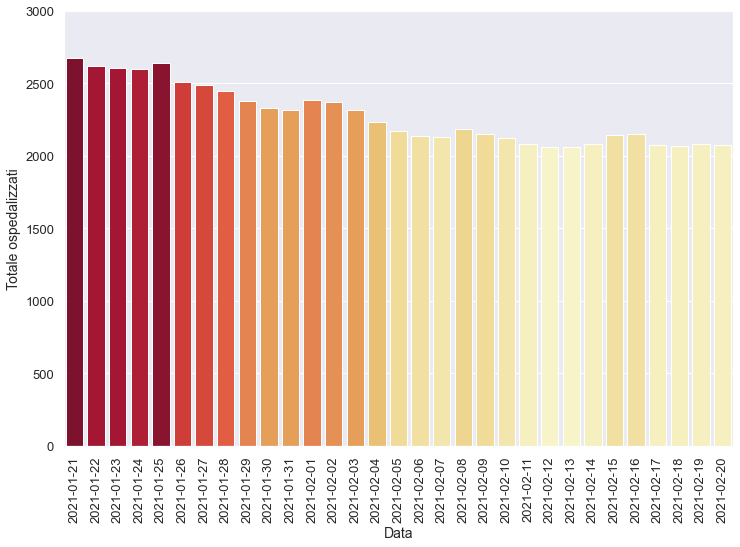

In [30]:
# Hospitalized positives in the last 30 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

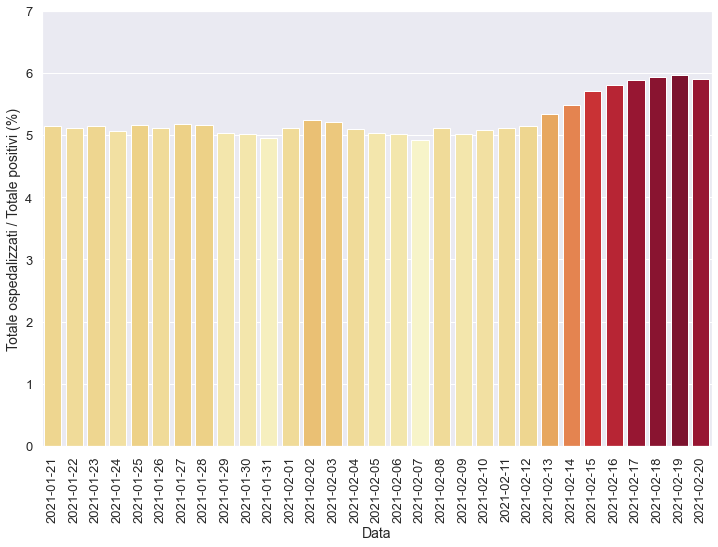

In [31]:
# Hospitalized positives in the last 30 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

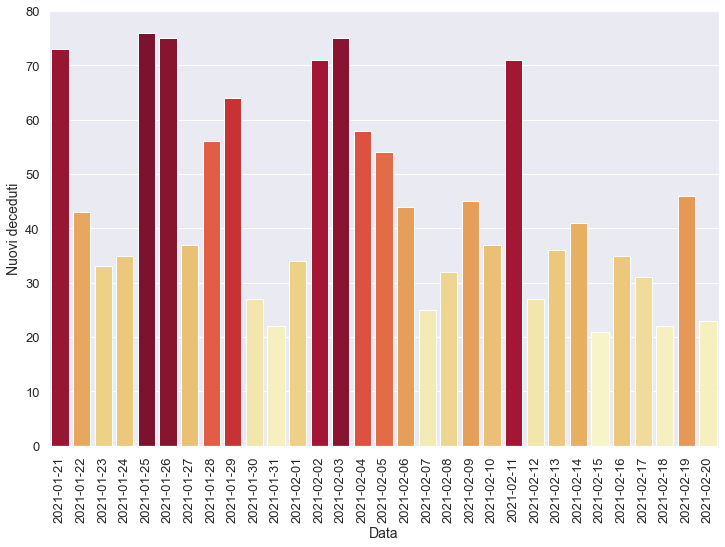

In [32]:
# New deads in the last 30 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

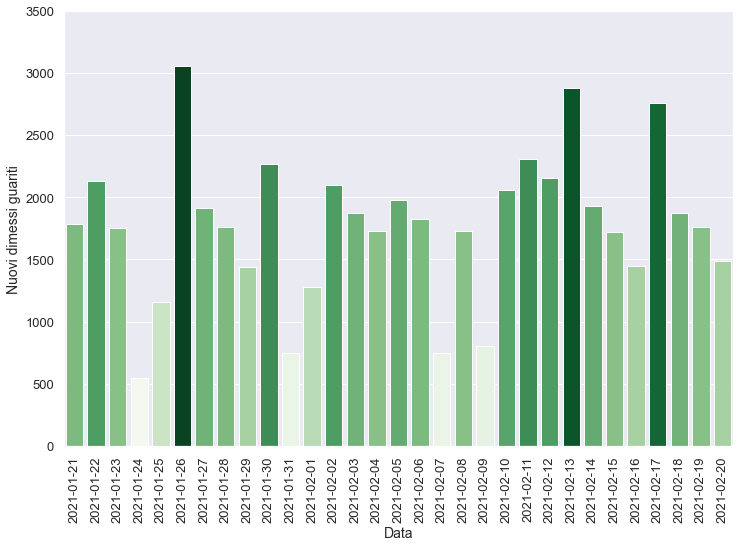

In [33]:
# New healed in the last 30 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [34]:
# TODO: define function
days = 7
path_img = '{path_img_root}/0{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2021-02-13T17:00:00,8,Emilia-Romagna,1889,171,2060,36518,38578,-1435,1488,...,36.0,29053.0,4994.0,-1434.0,8.30,5.34,5.12,29.80,-2.29,-3.59
1,2021-02-14T17:00:00,8,Emilia-Romagna,1911,171,2082,35838,37920,-658,1323,...,41.0,16816.0,4667.0,-680.0,8.21,5.49,7.87,28.35,0.00,-1.71
2,2021-02-15T17:00:00,8,Emilia-Romagna,1972,172,2144,35426,37570,-350,1391,...,21.0,12058.0,3290.0,-412.0,8.02,5.71,11.54,42.28,0.58,-0.92
3,2021-02-16T17:00:00,8,Emilia-Romagna,1975,175,2150,34887,37037,-533,968,...,35.0,34678.0,5876.0,-539.0,8.14,5.81,2.79,16.47,1.74,-1.42
4,2021-02-17T17:00:00,8,Emilia-Romagna,1902,176,2078,33190,35268,-1769,1025,...,31.0,27947.0,5739.0,-1697.0,8.47,5.89,3.67,17.86,0.57,-4.78
5,2021-02-18T17:00:00,8,Emilia-Romagna,1890,181,2071,32858,34929,-339,1565,...,22.0,29633.0,5787.0,-332.0,8.74,5.93,5.28,27.04,2.84,-0.96
6,2021-02-19T17:00:00,8,Emilia-Romagna,1902,183,2085,32852,34937,8,1821,...,46.0,30716.0,5022.0,-6.0,8.78,5.97,5.93,36.26,1.10,0.02
7,2021-02-20T17:00:00,8,Emilia-Romagna,1899,176,2075,33058,35133,196,1724,...,23.0,31943.0,6500.0,206.0,8.48,5.91,5.40,26.52,-3.83,0.56


In [35]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

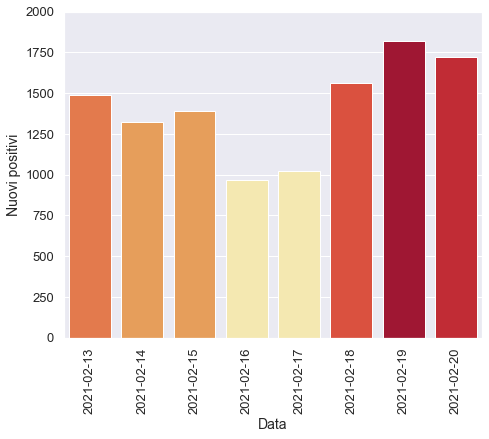

In [36]:
# New positives on new swabs in the last 7 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

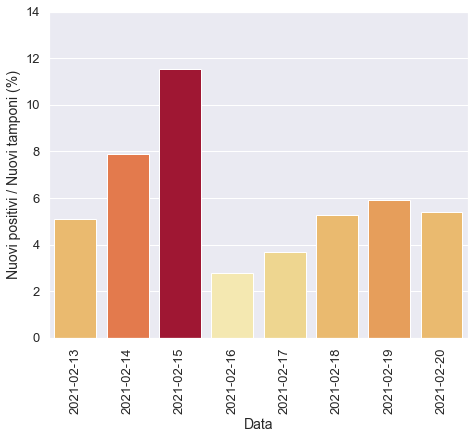

In [37]:
# New positives on new swabs in the last 7 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

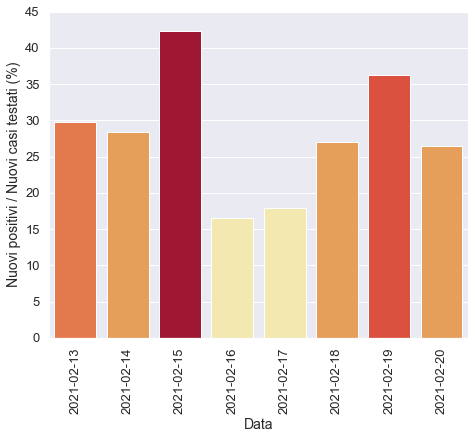

In [38]:
# New positives on new tested cases in the last 7 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

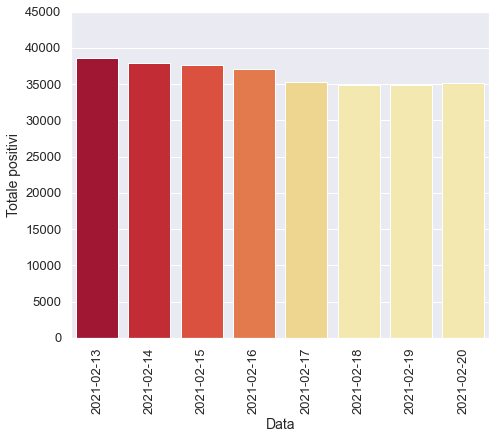

In [39]:
# Percentage of variation of positives in the last 7 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

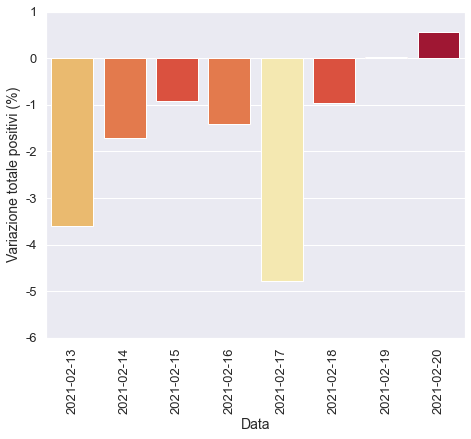

In [40]:
# Percentage of variation of positives in the last 7 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

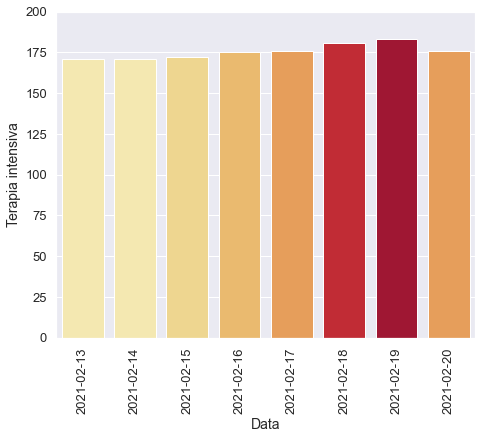

In [41]:
# Positives in ICU in the last 7 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

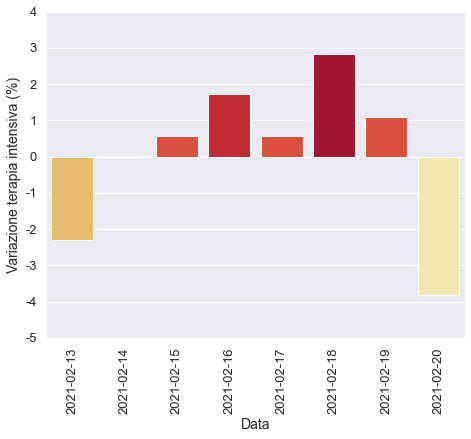

In [42]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

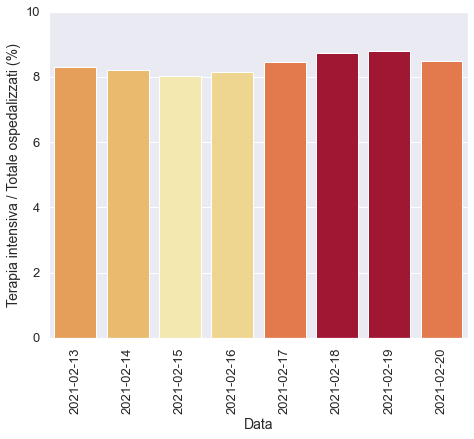

In [43]:
# Positives in ICU in the last 7 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

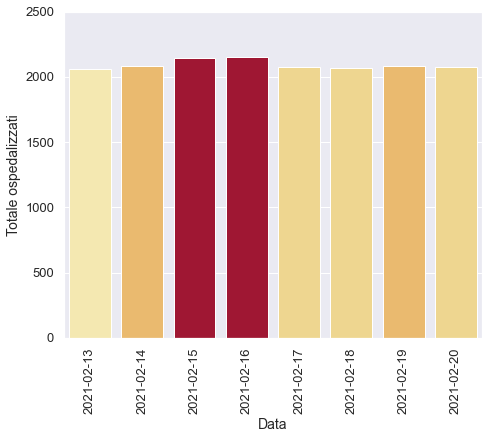

In [44]:
# Hospitalized positives in the last 7 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

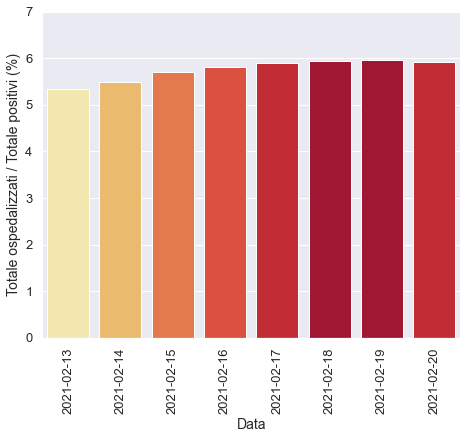

In [45]:
# Hospitalized positives in the last 7 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

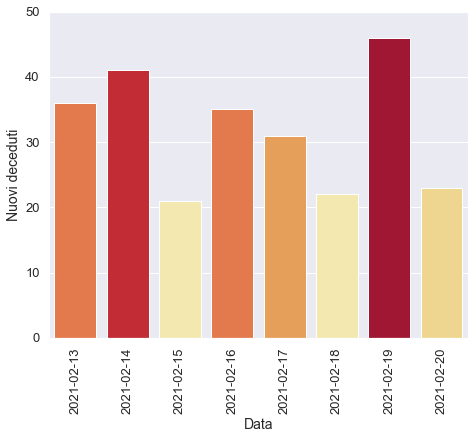

In [46]:
# New deads in the last 7 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

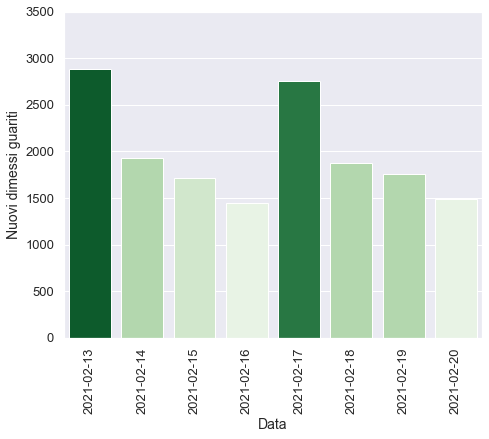

In [47]:
# New healed in the last 7 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)